
# Mi primer modelo Python

We'll be trying to predict a classification- survival or deceased.Let's begin our understanding of implementing Logistic Regression in Python for classification.

## Import Libraries
Let's import some libraries to get started!

https://www.kaggle.com/fatmakursun/titanic-classification-regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#virtualenv

## The Data


In [5]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

#### Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<AxesSubplot:xlabel='Survived', ylabel='count'>

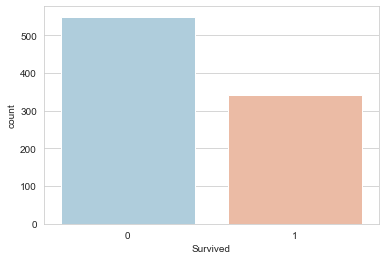

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, palette='RdBu_r')

In [11]:
train['Survived'].mean()

0.3838383838383838

In [12]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [11]:
#score test = 0.62200
#test sobreviventes = 1 - 0.62200 = 0.38

In [13]:
test = pd.read_csv('Data/test.csv')

In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
test['Survived'] = 0
test[['PassengerId', 'Survived']].to_csv('kaggle/todosmueren.csv', index=False)

Hipótesis:
- Las mujeres que sobrevivieron son mayores    

<AxesSubplot:xlabel='Survived', ylabel='count'>

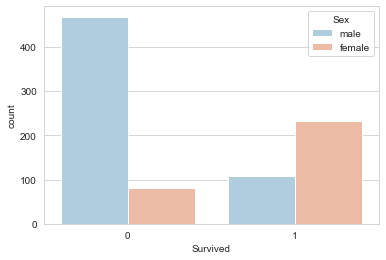

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

In [16]:
train.groupby(['Sex']).agg({'Survived':['count','mean', 'sum'], 'Age':'mean'})

Survived                       Age
          count      mean  sum       mean
Sex                                      
female      314  0.742038  233  27.915709
male        577  0.188908  109  30.726645

In [17]:
train['Survived'].mean()

0.3838383838383838

In [19]:
test[['PassengerId', 'Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [21]:
test['Survived'] = 0
test['Survived'] = np.where(test['Sex']=='female',1, 0)

test[['PassengerId', 'Survived']].to_csv('kaggle/mujeressobreviven.csv', index=False)

#0.76555

In [22]:
train['mayor_60'] = np.where(train['Age']>60,1,0)

In [23]:
train.groupby('mayor_60').agg({'Survived':['mean', 'count'], 'Age':'mean'})

Survived              Age
              mean count       mean
mayor_60                           
0         0.387802   869  28.544321
1         0.227273    22  66.022727

In [24]:
train.groupby(['Sex', 'mayor_60']).agg({'Survived':['mean', 'count'], 'Age':'mean'})

Survived              Age
                     mean count       mean
Sex    mayor_60                           
female 0         0.739550   311  27.511628
       1         1.000000     3  62.666667
male   0         0.191756   558  29.158226
       1         0.105263    19  66.552632

<AxesSubplot:xlabel='Survived', ylabel='count'>

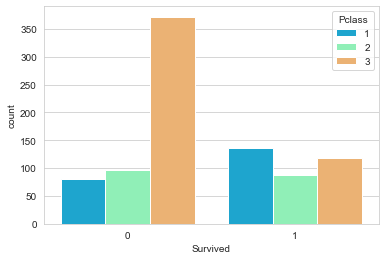

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

Distribución de las edad

<AxesSubplot:xlabel='Age', ylabel='Density'>

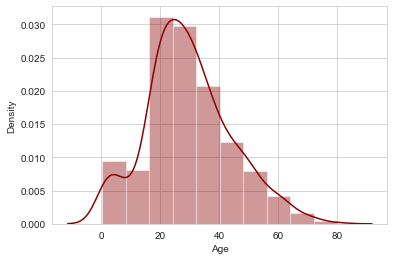

In [31]:
sns.distplot(train['Age'], kde=True, color='darkred', bins=10)

In [32]:
train['Age'].isnull().sum()

177

<AxesSubplot:>

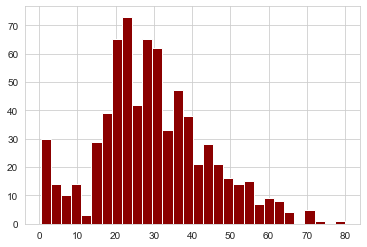

In [33]:
train['Age'].hist(bins=30,color='darkred',alpha=1)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

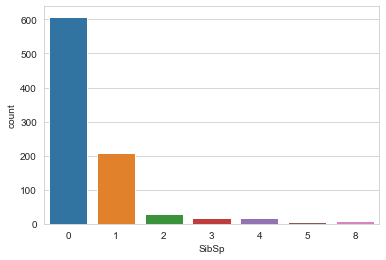

In [34]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

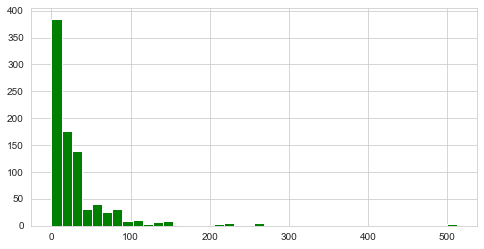

In [35]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [36]:
train.loc[train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mayor_60
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [37]:
import missingno as msno

<AxesSubplot:>

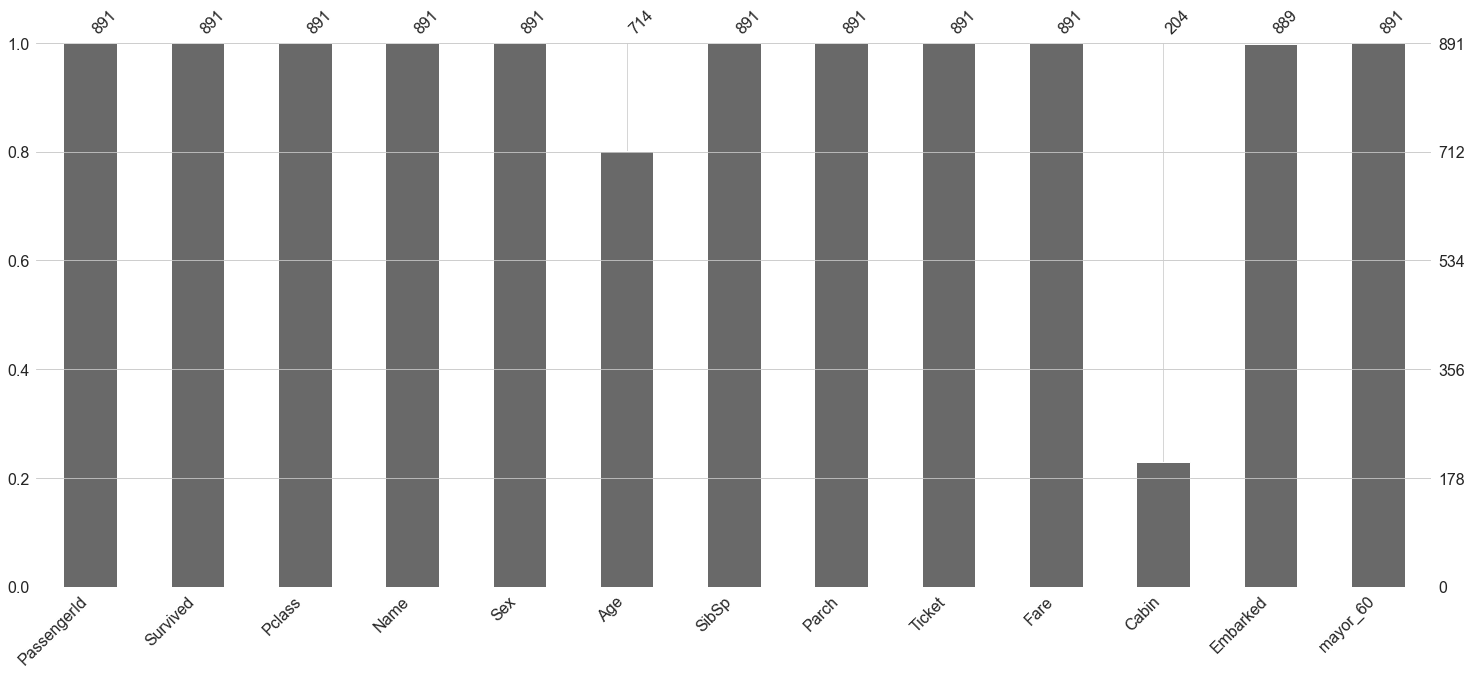

In [39]:
msno.bar(train)

<AxesSubplot:>

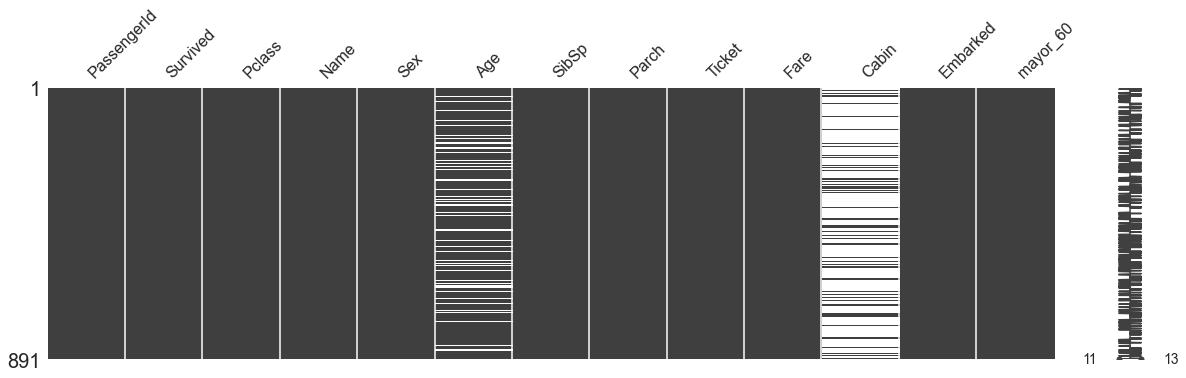

In [40]:
msno.matrix(train, figsize=(20,5))

<AxesSubplot:>

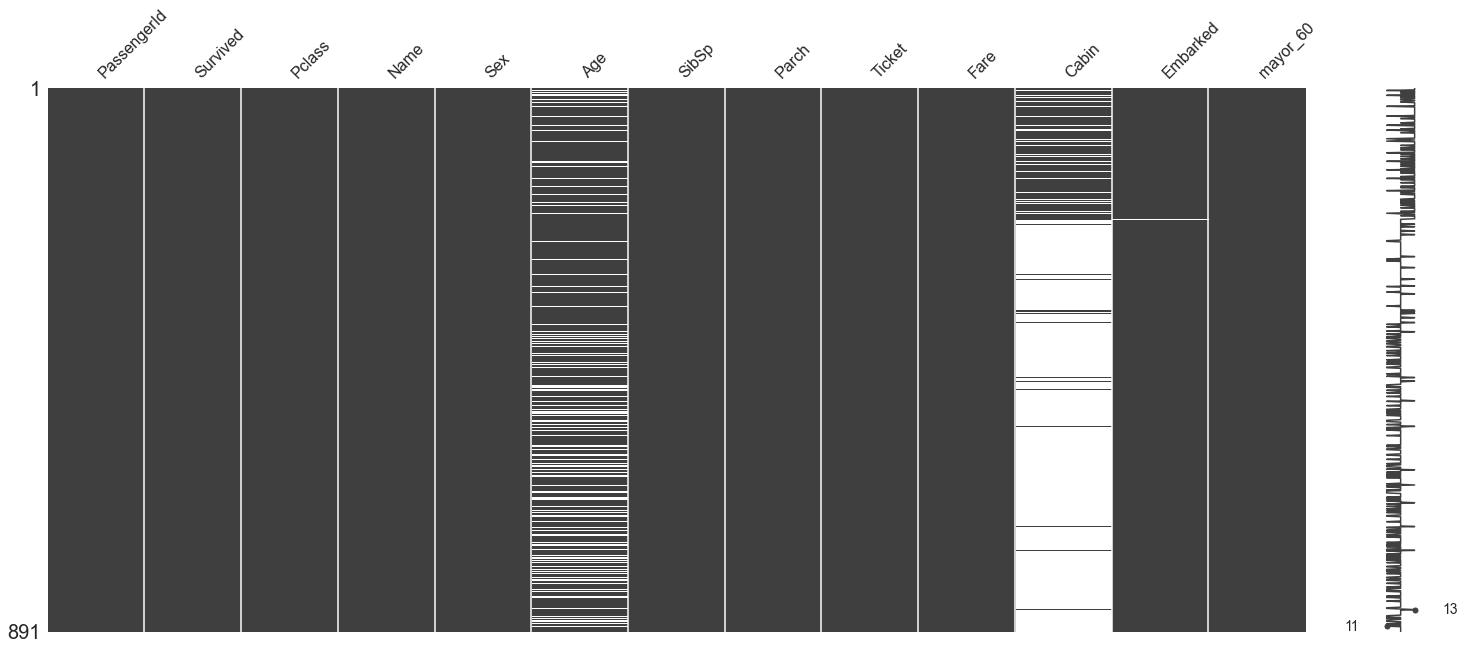

In [33]:
train_sort = train.sort_values('Pclass')
msno.matrix(train_sort)

<AxesSubplot:>

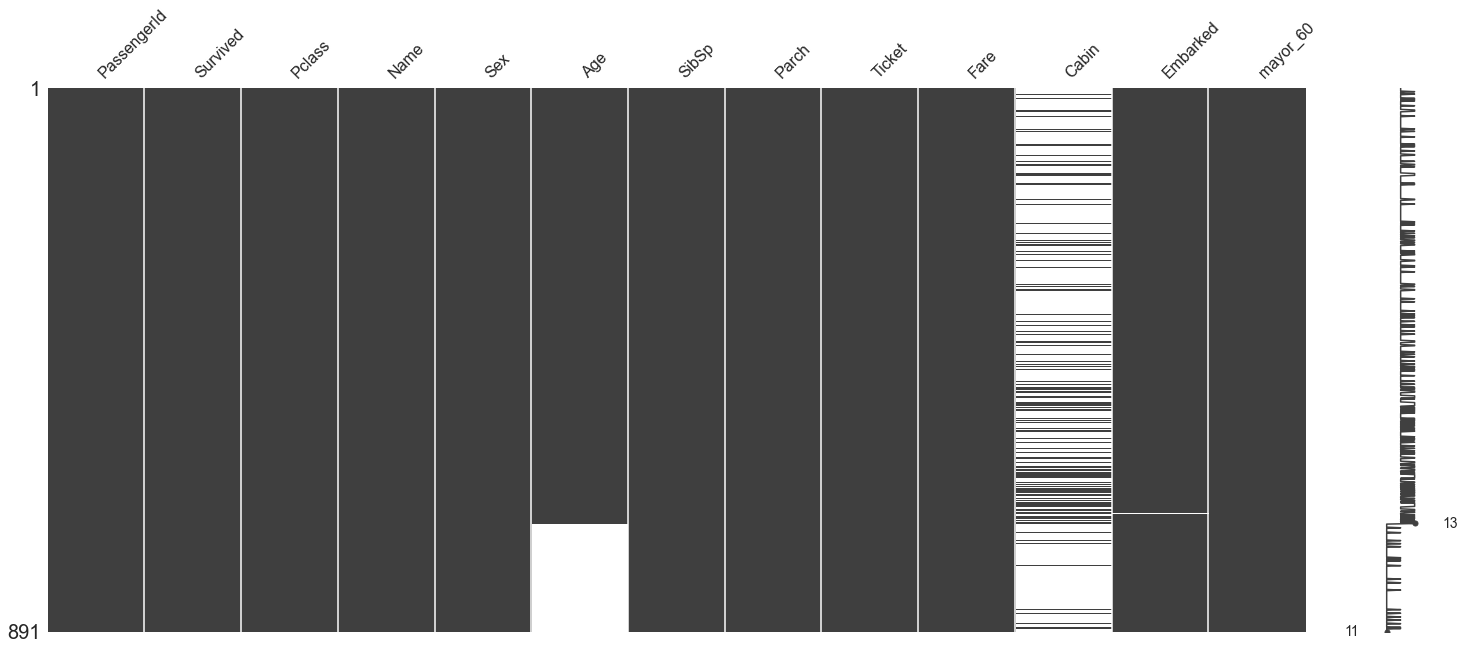

In [42]:
train_sort = train.sort_values('Age')
msno.matrix(train_sort)

Hipótesis:
- Las personas de mayor edad son las que compran las clases más altas.


In [51]:
train.groupby(['mayor_60', 'Pclass']).agg({'PassengerId':'count'})
14/22

0.6363636363636364

In [52]:
train[train['mayor_60'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mayor_60
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,1
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,1
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,1
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,1
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,1


Se usa 'cabin', obtener información sobre la clase 1, e identificar la letra, pareto.

"Usar esto en todos los problemas, y en todos los contextos"

<AxesSubplot:>

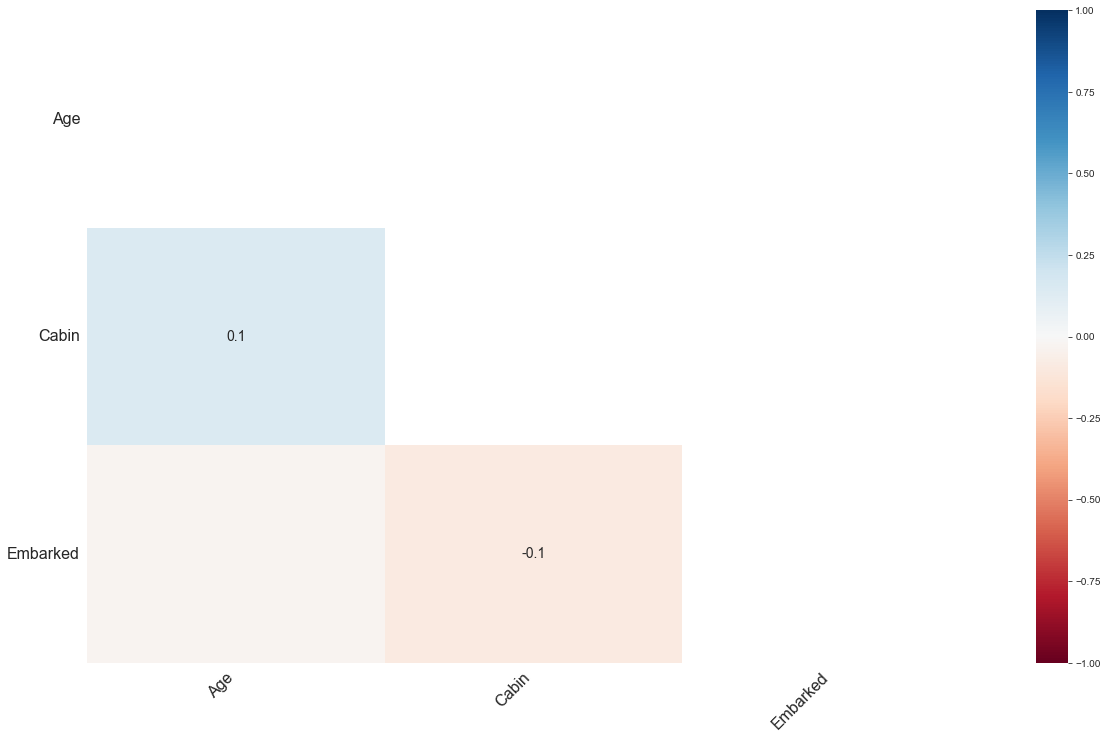

In [53]:
msno.heatmap(train_sort)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


In [54]:
train['Age'].isnull().mean()

0.19865319865319866

In [36]:
print(train['Age'].median())
print(train['Age'].mean())

28.0
29.69911764705882


In [56]:
print(train['Fare'].median())
print(train['Fare'].mean())

14.4542
32.204207968574636


In [57]:
train.groupby('Pclass').agg({'Age':['mean', 'median']})

Age       
             mean median
Pclass                  
1       38.233441   37.0
2       29.877630   29.0
3       25.140620   24.0

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

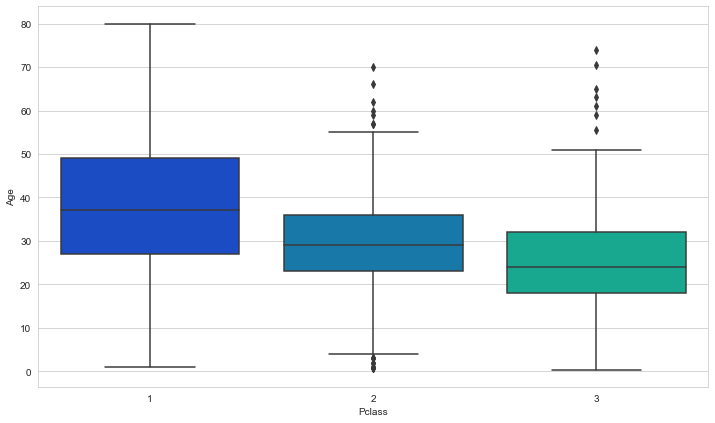

In [58]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [59]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [64]:
train[['Age','Pclass']].head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [61]:
train['Age_class'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mayor_60,Age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0


<AxesSubplot:>

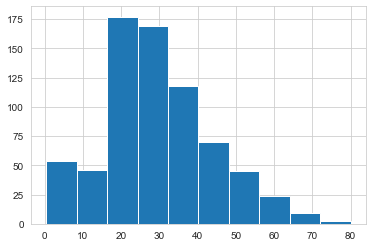

In [65]:
train['Age'].hist()

<AxesSubplot:>

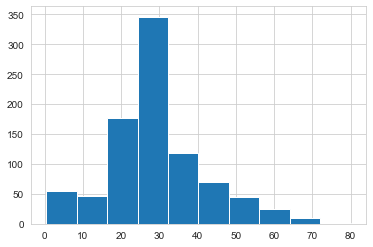

In [66]:
train['Age'].fillna(train['Age'].mean()).hist()

<AxesSubplot:>

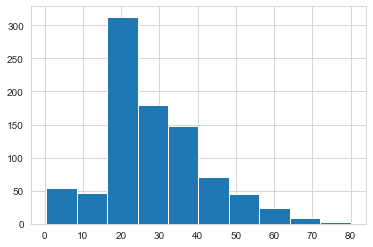

In [67]:
train['Age_class'].hist()

<AxesSubplot:>

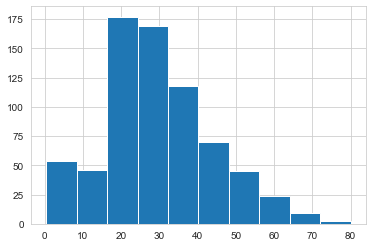

In [68]:
train['Age'].hist()

Now let's check that heat map again!

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [69]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
mayor_60       0.000000
Age_class      0.000000
dtype: float64

In [70]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [71]:
train.drop('Cabin',axis=1,inplace=True)

In [72]:
train.drop('Age',axis=1,inplace=True)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,mayor_60,Age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,0,35.0


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  mayor_60     891 non-null    int32  
 11  Age_class    891 non-null    float64
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [75]:
train.dropna(inplace=True)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  mayor_60     889 non-null    int32  
 11  Age_class    889 non-null    float64
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 86.8+ KB


# Detectando Outliers 

<AxesSubplot:title={'center':'Histogram of the age variable'}, ylabel='Frequency'>

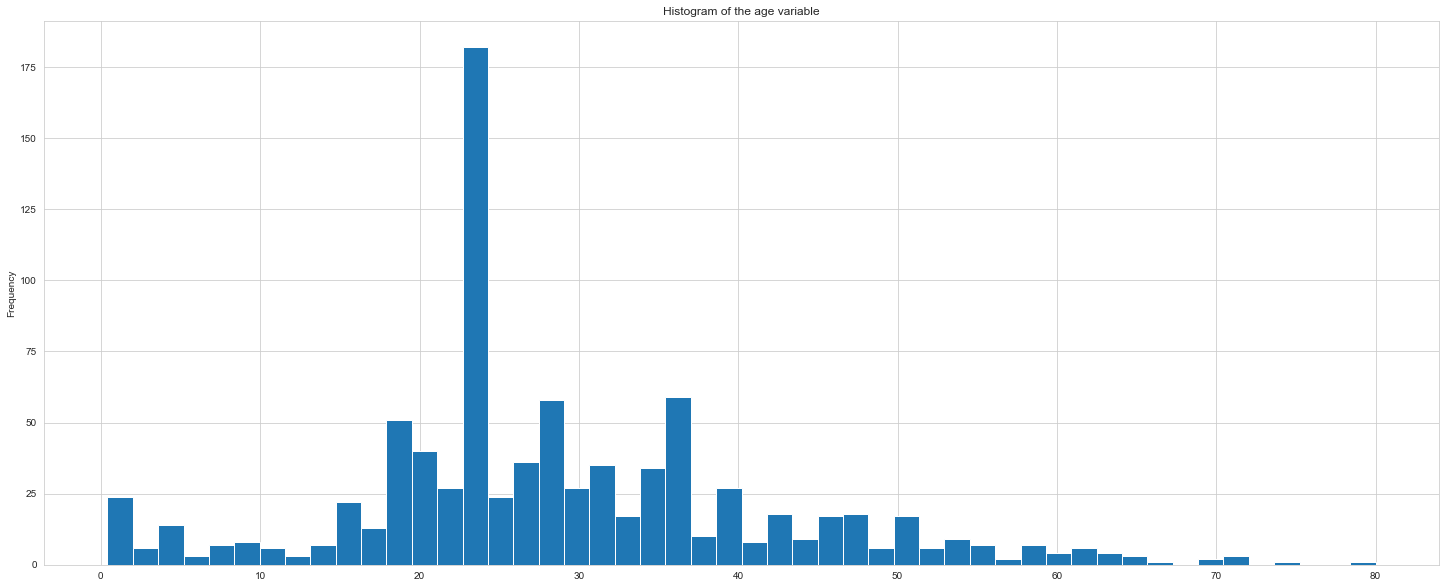

In [79]:
#A través de histogramas

train['Age_class'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable", figsize=(25,10)
)

<AxesSubplot:title={'center':'Histogram of the age variable'}, ylabel='Frequency'>

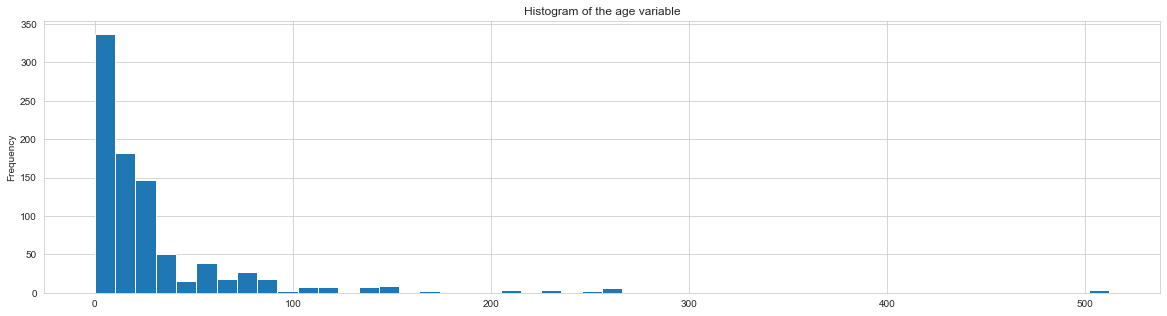

In [80]:
train['Fare'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable", figsize=(20,5)
)

# Z-score

Si el Z-score es menor que 2.5 o más grande que 2.5 el valor esta en el 5% de los más grandes o más pequeños.

z = (x – μ) / σ

In [81]:
from scipy.stats import zscore
#train = train.dropna()
#mean = 0
#sd = 1

train["age_zscore"] = zscore(train["Age_class"])

train["is_outlier"] = np.where((train["age_zscore"] <= -3) | (train["age_zscore"] >= 3), True, False)


In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,mayor_60,Age_class,age_zscore,is_outlier
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,0,22.0,-0.531670,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,0,38.0,0.680232,False
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,0,26.0,-0.228695,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,0,35.0,0.453001,False
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,0,35.0,0.453001,False


In [64]:
train['age_zscore'].describe()

count    8.890000e+02
mean     2.677523e-16
std      1.000563e+00
min     -2.166224e+00
25%     -5.316702e-01
50%     -2.286946e-01
75%      5.666164e-01
max      3.861476e+00
Name: age_zscore, dtype: float64

In [84]:
train.loc[train["is_outlier"]==True].min()

PassengerId                         97
Survived                             0
Pclass                               1
Name           Artagaveytia, Mr. Ramon
Sex                               male
SibSp                                0
Parch                                0
Ticket                           27042
Fare                              7.75
Embarked                             C
mayor_60                             1
Age_class                         70.0
age_zscore                    3.104037
is_outlier                        True
dtype: object

# DBSCAN - Density-Based Spatial Clustering of Application with Noise

<AxesSubplot:xlabel='Age_class', ylabel='Fare'>

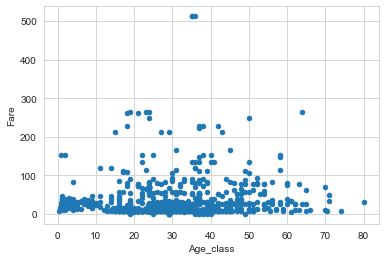

In [85]:
ageAndFare = train[["Age_class", "Fare"]]
ageAndFare.plot.scatter(x = "Age_class", y = "Fare")

Casos de la vida real:
    - 

In [86]:
# Paquete pickle en la etapa de producción
# pkl.load() aplicar un transform a esto
# "Permanecer el objeto"

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()    # instancio el objeto
scaler.fit(ageAndFare)    # obtiene el min, max
ageAndFare = scaler.transform(ageAndFare)    # aplica la distribución 


ageAndFare = pd.DataFrame(ageAndFare, columns = ["Age", "Fare"])

In [88]:
ageAndFare

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
884,0.334004,0.025374
885,0.233476,0.058556
886,0.296306,0.045771
887,0.321438,0.058556


In [74]:
ageAndFare.describe()

,Age,Fare
count,889.000000,889.000000
mean,0.359378,0.062649
std,0.165994,0.097003
min,0.000000,0.000000
25%,0.271174,0.015412
50%,0.321438,0.028213
75%,0.453380,0.060508
max,1.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='Fare'>

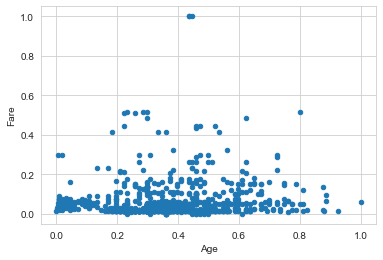

In [75]:
ageAndFare.plot.scatter(x = "Age", y = "Fare")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

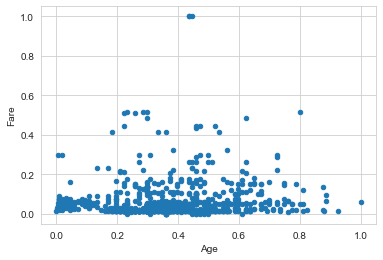

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ageAndFare = scaler.fit_transform(ageAndFare)
ageAndFare = pd.DataFrame(ageAndFare, columns = ["Age", "Fare"])
ageAndFare.plot.scatter(x = "Age", y = "Fare")

In [96]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(
  eps = 0.05,
  metric="euclidean",
  min_samples = 10,
  n_jobs = -1)   #usa todos los recursos de mi computador (potencia de mi máquina)

clusters = outlier_detection.fit_predict(ageAndFare)

#clusters

In [97]:
train['cluster'] = clusters

In [98]:
train['cluster'].value_counts()

 0    832
-1     57
Name: cluster, dtype: int64

In [99]:
train['outlier'] = np.where(train['cluster']==-1, 1, 0)

In [100]:
ageAndFare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     889 non-null    float64
 1   Fare    889 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


In [101]:
train.loc[train['cluster']==-1]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,mayor_60,Age_class,age_zscore,is_outlier,cluster,outlier
27,28,0,1,"Fortune, Mr. Charles Alexander",male,3,2,19950,263.0000,S,0,19.00,-0.758902,False,-1,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,1,0,PC 17569,146.5208,C,0,37.00,0.604488,False,-1,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,0,1,113509,61.9792,C,1,65.00,2.725318,False,-1,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,3,2,19950,263.0000,S,0,23.00,-0.455926,False,-1,1
96,97,0,1,"Goldschmidt, Mr. George B",male,0,0,PC 17754,34.6542,C,1,71.00,3.179781,True,-1,1
116,117,0,3,"Connors, Mr. Patrick",male,0,0,370369,7.7500,Q,1,70.50,3.141909,True,-1,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,0,1,PC 17558,247.5208,C,0,24.00,-0.380182,False,-1,1
195,196,1,1,"Lurette, Miss. Elise",female,0,0,PC 17569,146.5208,C,0,58.00,2.195110,False,-1,1
245,246,0,1,"Minahan, Dr. William Edward",male,2,0,19928,90.0000,Q,0,44.00,1.134696,False,-1,1
258,259,1,1,"Ward, Miss. Anna",female,0,0,PC 17755,512.3292,C,0,35.00,0.453001,False,-1,1


**label encoding:**
**target enconding:** Distribuir de acuerdo a otra variable. Ejemplo: Distribuir los coches se
        según se hallan reparado o no.

In [102]:
train.loc[train['Fare']>450]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,mayor_60,Age_class,age_zscore,is_outlier,cluster,outlier
258,259,1,1,"Ward, Miss. Anna",female,0,0,PC 17755,512.3292,C,0,35.0,0.453001,False,-1,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,0,1,PC 17755,512.3292,C,0,36.0,0.528744,False,-1,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,0,0,PC 17755,512.3292,C,0,35.0,0.453001,False,-1,1


In [103]:
ageAndFare.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [104]:
ageAndFare['outlier'].value_counts()

KeyError: 'outlier'

In [ ]:
ageAndFare['outlier']=train['outlier']

In [ ]:
train['outlier']

In [ ]:
ageAndFare.loc[ageAndFare['cluster']==-1]

In [ ]:
ageAndFare['cluster'].value_counts()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

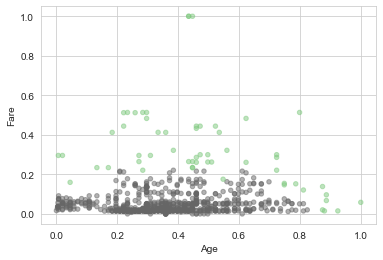

In [105]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
ageAndFare.plot.scatter(
  x = "Age",
  y = "Fare",
  c = clusters,
  cmap = cmap,
  colorbar = False, alpha=0.5
)

## Converting Categorical Features 
  We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [106]:
train = pd.read_csv('Data/train.csv')

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
train.groupby(['Embarked']).agg({'Survived':['mean', 'count']})

Survived      
              mean count
Embarked                
C         0.553571   168
Q         0.389610    77
S         0.336957   644

In [113]:
sex = pd.get_dummies(train['Sex'],drop_first=True, prefix='Sex')

embark = pd.get_dummies(train['Embarked'],drop_first=True, prefix='Embarked')

In [114]:
embark.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
#S = 01
#Q = 10
#C = 00
embark

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [117]:
train.drop(['Sex','Embarked','Name','Ticket', 'Cabin'],axis=1,inplace=True)

In [118]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [119]:
sex.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [120]:
embark.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [121]:
train = pd.concat([train,sex,embark],axis=1)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dftrain = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
dftrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [125]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
dftrain = pd.DataFrame(imputer.fit_transform(dftrain), columns = dftrain.columns)

In [126]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


<AxesSubplot:>

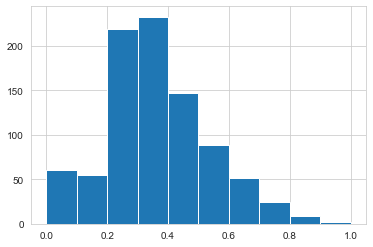

In [127]:
dftrain['Age'].hist()

<AxesSubplot:>

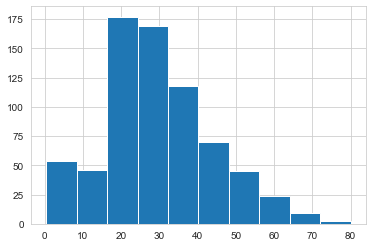

In [128]:
train['Age'].hist()

In [129]:
dftrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [137]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


### Great! Our data is ready for our model!

## Building a Logistic Regression model
 Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [ ]:
predictors = [var for var in dftrain if var not in ['PassengerId', 'Survived']]

In [ ]:
predictors

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dftrain, 
                                                    dftrain['Survived'], test_size=0.20, stratify=dftrain['Survived']
                                                    random_state=100)

#stratify=dftrain['Survived']
#cuidado con el orden

In [ ]:
y_train.mean()

In [ ]:
y_test.mean()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression() #instanciar
logmodel.fit(X_train[predictors],y_train) #entrenar

In [ ]:
predictions = logmodel.predict(X_test[predictors]) # predecir
X_test.head()

In [ ]:
X_test['y_pred'] = predictions

In [ ]:
X_test.head()

In [ ]:
X_test.head()

## Evaluation

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
logmodel_all = LogisticRegression() #instanciar
logmodel_all.fit(dftrain[predictors],dftrain['Survived']) #entrenar

In [ ]:
print(classification_report(dftrain['Survived'],logmodel_all.predict(dftrain[predictors])))

In [ ]:
X_train.head()

# Decision Tree Classifiction

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train[predictors],y_train)

In [ ]:
dt_pred = dt_model.predict(X_test[predictors])

In [ ]:
print(confusion_matrix(y_test,dt_pred))

In [ ]:
print(classification_report(y_test,dt_pred))

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(n_estimators=50)
rf.fit(X_train[predictors],y_train)

In [ ]:
rf_pre=rf.predict(X_test[predictors])

In [ ]:
print(confusion_matrix(y_test,rf_pre))

In [ ]:
print(classification_report(y_test,rf_pre))

Now we will use test dataset

In [ ]:
test = pd.read_csv('../input/test.csv')

In [ ]:
sns.heatmap(test.isnull())

In [ ]:
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [ ]:
test.info()

In [ ]:
test.head()

In [ ]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [ ]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [ ]:
test.head()

In [ ]:
test_prediction = rf.predict(test)

In [ ]:
test_prediction.shape

In [ ]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [ ]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [ ]:
new_test.head()

In [ ]:
df= new_test[['PassengerId' ,'Survived']]

In [ ]:
df.to_csv('predictions.csv' , index=False)